# Implement Random Forest Classifier model to predict the safety of the car.
Dataset link: https://www.kaggle.com/datasets/elikplim/car-evaluation-data-set


✅ Accuracy: 0.9710982658959537

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.89      0.94        83
           1       0.65      1.00      0.79        11
           2       0.99      1.00      0.99       235
           3       1.00      0.94      0.97        17

    accuracy                           0.97       346
   macro avg       0.91      0.96      0.92       346
weighted avg       0.98      0.97      0.97       346



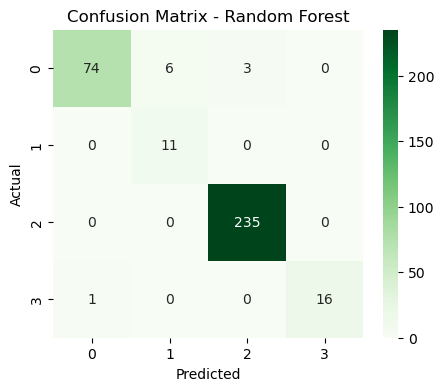

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Load dataset with proper column names
url = "./datasets/car_evaluation.csv"
columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df = pd.read_csv(url, names=columns, header=None)

# Step 2: Encode categorical values
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

# Step 3: Split into features and target
X = df.drop('class', axis=1)
y = df['class']

# Step 4: Split training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Train Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Step 6: Predictions
y_pred = rf.predict(X_test)

# Step 7: Evaluation
print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 8: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
